#  CREDIT EDA CASE STUDY


### Business Case :

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers.

Use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Understanding the Data :

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* All other cases: All other cases when the payment is paid on time.

### Possible OutComes

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application

2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

Need to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


## Business Objective


This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 


##  About the data


1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

###### Supressing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Importing Required Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

#### Changing display formats

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
about = pd.read_csv('columns_description.csv',encoding='iso-8859-1')

`application_data.csv` contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [6]:
data_application = pd.read_csv('application_data.csv')

In [7]:
data_application.shape

(307511, 122)

### CHECKING Info on the data loaded

In [94]:
data_application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307499 non-null  int64  
 1   TARGET                        307499 non-null  int64  
 2   NAME_CONTRACT_TYPE            307499 non-null  object 
 3   CODE_GENDER                   307499 non-null  object 
 4   FLAG_OWN_CAR                  307499 non-null  object 
 5   FLAG_OWN_REALTY               307499 non-null  object 
 6   CNT_CHILDREN                  307499 non-null  int64  
 7   AMT_INCOME_TOTAL              307499 non-null  float64
 8   AMT_CREDIT                    307499 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307499 non-null  float64
 11  NAME_TYPE_SUITE               307499 non-null  object 
 12  NAME_INCOME_TYPE              307499 non-nu

# DATA UNDERSTANDING AND PREPARATION

#### Checking for percentage of null values 

This analysis will yeild information about the data in following ways :
* We'll use this to identify what kind of data is missing, and whether its valid or not.
* Some columns based on their description if its less likely to derive `TARGET` feature, we'll just remove if null percentage is high. Threshold for such columns would be 45% or higher
* If null percentage is high and value is important based on its description, we'll try to impute the values.
* If null percentage is high but there is some correlation with `TARGET` we'll see which other rows they correlate to.

After Check, we'll have subset as follwing :

`cols_to_drop` : These will be the columns we'll drop, based on the type of values they hold.

`cols_to_impute` : These will be the columns we'll need to impute the null values using central tendencies

`cols_with_valid_null` : These will be columns we'll leave as is.

`cols_with_null_rows_dropped` : These will be columns, which have null for an important field and dont sway our TARGET variable significantly

***Note*** : Idea behind creating list of different column categories is to have it handy to cross check whenever required.

In [8]:
cols_to_drop = []
cols_to_impute = []
cols_with_valid_null = []
cols_with_null_rows_dropped = []

#### Find Percentage null values

In [120]:
data_application.isnull().sum()*100/data_application.shape[0]

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00000
AMT_GOODS_PRICE                 0.00000
NAME_TYPE_SUITE                 0.00000
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
OWN_CAR_AGE                     0.00000
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000


In [10]:
data_application['TARGET'].value_counts(normalize=True)

0   0.91927
1   0.08073
Name: TARGET, dtype: float64

**HANDLING NULL for :** `AMT_ANNUITY`

In [11]:
data_application[data_application['AMT_ANNUITY'].isnull()].shape

(12, 122)

All `AMT_ANNUITY` is null only for Cash Loans, by definition cash loans are :

> *Instant cash loans are short-term loans that are processed quickly, usually within an hour, giving you access to funds instantly. Also known as cash advance loans and pay day loans, this type of loans is ideal for situations when you need funds immediately.*

Here are few observations from other attributes of `AMT_ANNUITY` as null :
1. All the rows with aforementioned columns as null have Target as 0 below is observation :
> As the `TARGET` with value 0 is around 91% removing 0.003% will not sway 
2. Other rows are randomly distributed with respect to the 12 columns, that also should not introduce bias

Has handling of null, we are removing the rows where `AMT_ANNUITY` is null using following code :-

In [12]:
data_application = data_application.loc[~data_application['AMT_ANNUITY'].isnull(),:]

In [13]:
cols_with_null_rows_dropped.append('AMT_ANNUITY')

**HANDLING NULL for** : `AMT_GOODS_PRICE`

Checking the correlation of `AMT_GOODS_PRICE`with `AMT_CREDIT`

In [14]:
data_application[['AMT_CREDIT','AMT_GOODS_PRICE']].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.00000,0.98697
AMT_GOODS_PRICE,0.98697,1.00000


In [15]:
data_application[data_application['AMT_GOODS_PRICE'].isnull()].shape

(278, 122)

Most of the records are in 1:1 ratio for `AMT_GOODS_PRICE` : `AMT_CREDIT`

In [16]:
round((data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']),0).value_counts(normalize=True)

1.00000   0.99937
2.00000   0.00044
0.00000   0.00009
3.00000   0.00008
4.00000   0.00001
7.00000   0.00001
dtype: float64

In [17]:
data_application[(data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']) == 1]['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         79531
Revolving loans    28673
Name: NAME_CONTRACT_TYPE, dtype: int64

In [18]:
data_application.loc[data_application['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE'] = data_application.loc[data_application['AMT_GOODS_PRICE'].isnull(),'AMT_CREDIT']

In [19]:
data_application[(data_application['AMT_GOODS_PRICE']/data_application['AMT_CREDIT']) == 1]['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         79531
Revolving loans    28951
Name: NAME_CONTRACT_TYPE, dtype: int64

In [20]:
data_application['AMT_GOODS_PRICE'].isnull().sum()

0

In [21]:
cols_to_impute.append('AMT_GOODS_PRICE')

All `AMT_GOODS_PRICE` is null only for Revolving Loans, by definition revolving loans are :

*A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations.*

We have seen that `AMT_GOODS_PRICE` and `AMT_CREDIT` are highly correlated, so much that in most of the cases `AMT_GOODS_PRICE` approximately equals to `AMT_CREDIT`

Hence imputing those values to `AMT_CREDIT`

**HANDLING FOR FIELD :** `NAME_TYPE_SUITE`

In [22]:
data_application['NAME_TYPE_SUITE'].isnull().sum()*100/len(data_application)

0.4201639680129041

In [23]:
data_application['NAME_TYPE_SUITE'].value_counts(normalize=True).index[0]

'Unaccompanied'

The Column `NAME_TYPE_SUITE` and only *0.4%* of rows are null we'll impute these with value `Unaccompanied` as its for *81%* of the clients, following is the code for the same :-

In [24]:
most_frequent = data_application['NAME_TYPE_SUITE'].value_counts(normalize=True).index[0]
data_application['NAME_TYPE_SUITE'].fillna(most_frequent,inplace=True)
print(f"All null removed for NAME_TYPE_SUITE = {data_application['NAME_TYPE_SUITE'].isnull().sum() == 0}")

All null removed for NAME_TYPE_SUITE = True


**HANDLING FOR FIELD :** `OWN_CAR_AGE`

In [25]:
data_application['OWN_CAR_AGE'].isnull().sum()*100/len(data_application)

65.99045850555612

In [26]:
data_application.loc[data_application['FLAG_OWN_CAR']=='N','OWN_CAR_AGE'].isnull().sum()*100/len(data_application)

65.98883248400807

In [27]:
data_application.loc[(data_application['OWN_CAR_AGE'].isnull()) & (data_application['FLAG_OWN_CAR']=='Y'),'OWN_CAR_AGE'].isnull().sum()

5

Based on above observation, following rules used to impute values : 
1. If client doesnt own a car the OWN_CAR_AGE should be 0
2. If client owns a car, then value should be imputed using Median

In [28]:
data_application.loc[(data_application['OWN_CAR_AGE'].isnull()) & ((data_application['FLAG_OWN_CAR']=='Y')), 'OWN_CAR_AGE' ] = data_application['OWN_CAR_AGE'].describe()['50%']

In [29]:
data_application['OWN_CAR_AGE'].fillna(0,inplace=True)

In [30]:
data_application['OWN_CAR_AGE'].isnull().sum()

0

In [31]:
cols_to_impute.append('OWN_CAR_AGE')

**HANDLING FOR FIELD :** `OCCUPATION_TYPE`

In [32]:
data_application['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                0.26140
Sales staff             0.15206
Core staff              0.13059
Managers                0.10123
Drivers                 0.08812
High skill tech staff   0.05390
Accountants             0.04648
Medicine staff          0.04043
Security staff          0.03183
Cooking staff           0.02816
Cleaning staff          0.02204
Private service staff   0.01256
Low-skill Laborers      0.00991
Waiters/barmen staff    0.00639
Secretaries             0.00618
Realty agents           0.00356
HR staff                0.00267
IT staff                0.00249
Name: OCCUPATION_TYPE, dtype: float64

Since the `OCCUPATION_TYPE` was a categorical value which was Missing at completely at random and we could not derive, we created another cateogry to handle these null

Following is the code :

In [33]:
data_application['OCCUPATION_TYPE'].fillna('Undefined',inplace=True)

**HANDLING for field :** `CNT_FAM_MEMBERS`

In [34]:
print(data_application['CNT_FAM_MEMBERS'].describe())
print(f"mode : {data_application['CNT_FAM_MEMBERS'].mode()}")

count   307497.00000
mean         2.15268
std          0.91069
min          1.00000
25%          2.00000
50%          2.00000
75%          3.00000
max         20.00000
Name: CNT_FAM_MEMBERS, dtype: float64
mode : 0   2.00000
dtype: float64


Since the mean/median/mode are all around 2 we will impute null as 2, following is the code

In [35]:
data_application['CNT_FAM_MEMBERS'].isnull().sum()

2

In [36]:
data_application['CNT_FAM_MEMBERS'].fillna(2,inplace=True)

In [37]:
data_application['CNT_FAM_MEMBERS'].isnull().sum()

0

**HANDLING FOR :** All Normalized fields _AVG/_MEDI/_MODE 

In [38]:
print(data_application['REGION_RATING_CLIENT'].value_counts(normalize=True))
print(data_application['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True))

2   0.73814
3   0.15717
1   0.10469
Name: REGION_RATING_CLIENT, dtype: float64
2   0.74627
3   0.14263
1   0.11110
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


**HANDLING NULL FOR :** Normalized features about where client lives

We will utlize already available information of `REGION_RATING_CLIENT` and `REGION_RATING_CLIENT_W_CITY`
And try to map (1,2,3) to (Low, Medium, High)

Currenlty we are not aware which of (1 or 3) is a  (High or Low)

Once that is done it'll eliminate the need of Normalized information about where client lives

Reason for this approach : Since these normalized columns have more than `50%` of columns as null, its best if we could find a feature in the data that could safely represent what this normalized data is trying to represent.

For this we'll perform multivariate analysis on these columns which seem to be related to the region/area where the client lives and try to find how these attributes are related

In [64]:
#Starting with finding correlation of all these columns with the Target variable
client_living_condition_col =['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','TARGET', 'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
s = data_application.loc[:,client_living_condition_col].corr()['TARGET']*100

In [67]:
s[(s < -3) | (s > 5)]

REGION_RATING_CLIENT_W_CITY     6.08860
REGION_RATING_CLIENT            5.88920
TARGET                        100.00000
ELEVATORS_AVG                  -3.41968
FLOORSMAX_AVG                  -4.40005
FLOORSMIN_AVG                  -3.36153
LIVINGAREA_AVG                 -3.29952
ELEVATORS_MODE                 -3.21306
FLOORSMAX_MODE                 -4.32231
FLOORSMIN_MODE                 -3.26994
LIVINGAREA_MODE                -3.06841
ELEVATORS_MEDI                 -3.38608
FLOORSMAX_MEDI                 -4.37651
FLOORSMIN_MEDI                 -3.33961
LIVINGAREA_MEDI                -3.27373
TOTALAREA_MODE                 -3.25958
Name: TARGET, dtype: float64

From above we see that the values are very slightly correlated to the target column, max value -4, lets see if theres anything can these values correlate to and we can use to draw inference
We start by picking the attributes that have abs highest correlation with target field

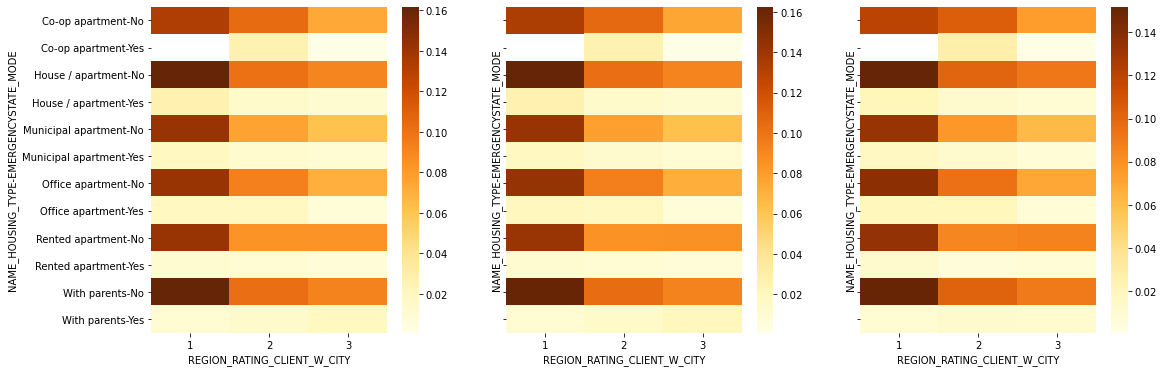

In [63]:
subset = data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','LIVINGAREA_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE']]
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_AVG'],annot=False,ax=ax[0],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_MEDI'],annot=False,ax=ax[1],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['LIVINGAREA_MODE'],annot=False,ax=ax[2],cmap='YlOrBr',fmt='')

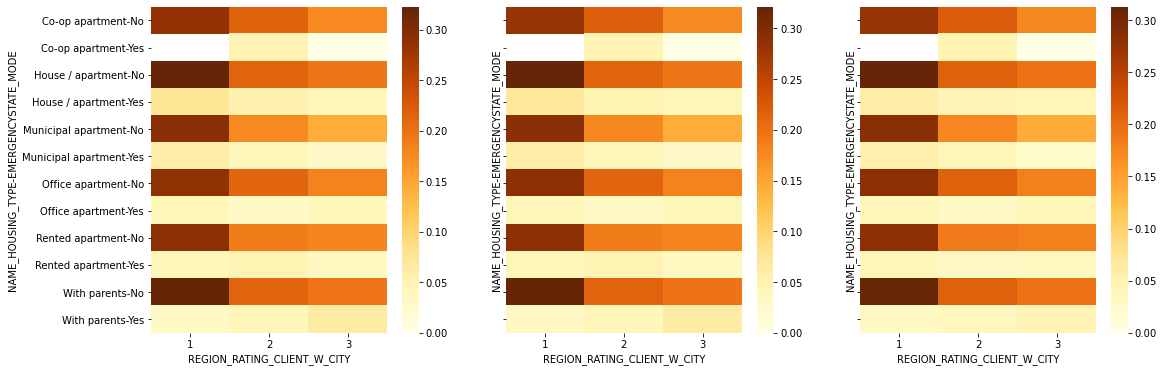

In [52]:
subset = pd.merge(data_application.loc[:,data_application.filter(like='FLOORSMAX_').columns],data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE']],left_index=True,right_index=True)
fig,ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(18, 6, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_AVG'],annot=False,ax=ax[0],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_MEDI'],annot=False,ax=ax[1],cmap='YlOrBr',fmt='')
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['FLOORSMAX_MODE'],annot=False,ax=ax[2],cmap='YlOrBr',fmt='')

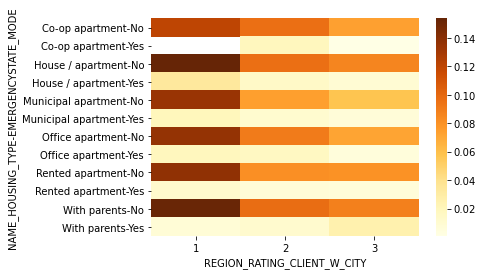

In [62]:
subset = data_application[['REGION_RATING_CLIENT_W_CITY','NAME_HOUSING_TYPE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','TOTALAREA_MODE']]
fig,ax = plt.subplots(ncols=1,sharey=True)
fig.set_size_inches(6, 4, forward=True)
sns.heatmap(subset.pivot_table(index=['NAME_HOUSING_TYPE','EMERGENCYSTATE_MODE'],columns=['REGION_RATING_CLIENT_W_CITY'],aggfunc='mean')['TOTALAREA_MODE'],annot=False,cmap='YlOrBr',fmt='')


From above observation its safe to assume that

For the fields : `REGION_RATING_CLIENT_W_CITY` and `REGION_RATING_CLIENT` the values
> 1 corresponds to High | 
2 corresponds to Medium | 
3 corresponds to Low

That is even fortified by the fact that the correlation is positive with target field, proving that with increase in value the `TARGET` is more likely to be 1

In [68]:
cols_to_drop.extend(data_application.filter(like='_AVG').columns)
cols_to_drop.extend(data_application.filter(like='_MEDI').columns)
cols_to_drop.extend(data_application.filter(like='_MODE').columns)

**HANDLING FIELDS FOR :** `FLAG_XX`

In [84]:
cols = [col for col in data_application.columns if "FLAG_DOCUMENT" in col]
cols.append('TARGET')
something = data_application.loc[:,cols]
something.corr()['TARGET']*100

FLAG_DOCUMENT_2      0.54171
FLAG_DOCUMENT_3      4.43463
FLAG_DOCUMENT_4     -0.26722
FLAG_DOCUMENT_5     -0.03015
FLAG_DOCUMENT_6     -2.86056
FLAG_DOCUMENT_7     -0.15197
FLAG_DOCUMENT_8     -0.80371
FLAG_DOCUMENT_9     -0.43531
FLAG_DOCUMENT_10    -0.14139
FLAG_DOCUMENT_11    -0.42301
FLAG_DOCUMENT_12    -0.07558
FLAG_DOCUMENT_13    -1.15839
FLAG_DOCUMENT_14    -0.94645
FLAG_DOCUMENT_15    -0.65361
FLAG_DOCUMENT_16    -1.16159
FLAG_DOCUMENT_17    -0.33778
FLAG_DOCUMENT_18    -0.79534
FLAG_DOCUMENT_19    -0.13578
FLAG_DOCUMENT_20     0.02151
FLAG_DOCUMENT_21     0.37084
TARGET             100.00000
Name: TARGET, dtype: float64

In [85]:
tmp = []
for col in something.columns:
    tmp_series = something.loc[something['TARGET']==1,col].value_counts(normalize=True)
    tmp_series.name = col
    tmp.append(tmp_series)
df_value_counts_defautler = pd.concat(tmp, axis=1)
tmp = []
for col in something.columns:
    tmp_series = something.loc[something['TARGET']==0,col].value_counts(normalize=True)
    tmp_series.name = col
    tmp.append(tmp_series)
df_value_counts_non_defaulter = pd.concat(tmp, axis=1)

cols.remove('TARGET')

In [87]:
df_value_counts_defautler

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0.99984,0.22207,1.00000,0.98502,0.93930,0.99988,0.92604,0.99702,1.00000,0.99698,1.00000,0.99879,0.99879,0.99956,0.99396,0.99992,0.99428,0.99952,0.99948,0.99944,nan
1,0.00016,0.77793,nan,0.01498,0.06070,0.00012,0.07396,0.00298,nan,0.00302,nan,0.00121,0.00121,0.00044,0.00604,0.00008,0.00572,0.00048,0.00052,0.00056,1.00000


In [88]:
df_value_counts_non_defaulter

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0.99997,0.29594,0.99991,0.98488,0.90954,0.99980,0.91798,0.99602,0.99998,0.99601,0.99999,0.99627,0.99691,0.99872,0.98973,0.99972,0.99166,0.99940,0.99949,0.99969,1.00000
1,0.00003,0.70406,0.00009,0.01512,0.09046,0.00020,0.08202,0.00398,0.00002,0.00399,0.00001,0.00373,0.00309,0.00128,0.01027,0.00028,0.00834,0.00060,0.00051,0.00031,nan


#### Observation about FLAG_DOCUMENT : 
**What is observed** : Above observation indicate that `FLAG_DOCUMENT_3` has is most submitted document, also have the highest correlation with `TARGET` all the other documents have a 5% submission ratio, and that remains same for both Defaulter and Non Defaulter.

**Descision** : Since this field shows little to no variation with respect to Target field and there are other fields which can have genuine impact we'll not focus on `FLAG_DOCUMENT_XX` Fields

In [89]:
cols_to_drop.extend(cols)
cols=[]

**HANDLING Last few columns left**

In [93]:
data_application.loc[:,data_application.filter]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307499 non-null  int64  
 1   TARGET                        307499 non-null  int64  
 2   NAME_CONTRACT_TYPE            307499 non-null  object 
 3   CODE_GENDER                   307499 non-null  object 
 4   FLAG_OWN_CAR                  307499 non-null  object 
 5   FLAG_OWN_REALTY               307499 non-null  object 
 6   CNT_CHILDREN                  307499 non-null  int64  
 7   AMT_INCOME_TOTAL              307499 non-null  float64
 8   AMT_CREDIT                    307499 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307499 non-null  float64
 11  NAME_TYPE_SUITE               307499 non-null  object 
 12  NAME_INCOME_TYPE              307499 non-nu

In [119]:
data_application.loc[:,['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
TARGET                         0
dtype: int64

In [107]:
data_application.loc[:,['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
count,306478.00000,306478.00000,306478.00000,306478.00000,307499.00000
mean,1.42229,0.14343,1.40534,0.10005,0.08073
std,2.40102,0.44671,2.37984,0.36230,0.27242
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2.00000,0.00000,2.00000,0.00000,0.00000
max,348.00000,34.00000,344.00000,24.00000,1.00000


As can be seen from the above chart, most of the values are 0, we'll be imputing the null with 0

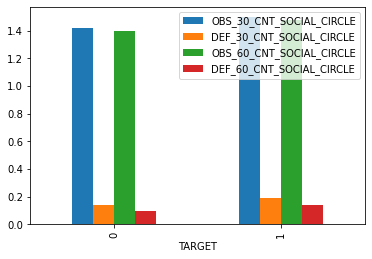

In [118]:
data_application.loc[:,\
                     ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',\
                      'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].groupby('TARGET').mean().plot.bar()

In [108]:
data_application.loc[:,['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].corr()['TARGET']

OBS_30_CNT_SOCIAL_CIRCLE   0.00913
DEF_30_CNT_SOCIAL_CIRCLE   0.03224
OBS_60_CNT_SOCIAL_CIRCLE   0.00902
DEF_60_CNT_SOCIAL_CIRCLE   0.03127
TARGET                     1.00000
Name: TARGET, dtype: float64

In [ ]:
application_data = data_application.drop(cols_to_drop,axis=1)

In [ ]:
application_data.corr()['TARGET']*100

In [ ]:
data_application.corr()['TARGET']*100

# DATA CLEANING AND FEATURE ENGINEERING

1. Converting columns to their proper data type.
2. Rounding off the data.
3. Converting Numerical to categorical when required.
4. 


## Data Cleaning and preparation for previous_application_data

1. Drop columns with null values with null > 30%
2. Check if there are outliers and outlier limits

# DATA ANALYSIS :

Following steps we'll be taking for the data analysis

* Check data imbalance and find imbalance percentage
* Categorize data with `TARGET` values {0,1}
* Univariate Analysis 
* Correlation between columns
* BiVariate Analysis
* MultiVariate Analysis

* Join perv to current data
* Based on the results from prev analysis, try to infer and create hypothesis

#  PRESENTATION AND RECOMMENDATIONS :

* Purpose
* Steps Involved
* Data Analysis performed
* Graphs from Univariate, BiVariate and Multivariate analysis
* Recommendations derived based from the analysis based on case study : Parameters that affect the loan defaulting.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [ ]:
data_previous = pd.read_csv('previous_application.csv')

In [ ]:
data_previous.shape

In [ ]:
len(data_previous.columns[data_previous.isna().any()].tolist())

In [ ]:
data_application.isnull().sum()